In [1]:
import os
import sys
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.io import loadmat

os.chdir('/home/rfpred')
sys.path.append('/home/rfpred')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode')

print(sys.path)
%pwd

['/home/rfpred/notebooks', '/home/rfpred/envs/rfenv/lib/python311.zip', '/home/rfpred/envs/rfenv/lib/python3.11', '/home/rfpred/envs/rfenv/lib/python3.11/lib-dynload', '', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages', '/home/rfpred', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode']


'/home/rfpred'

In [2]:
from funcs.imgproc import get_imgs_designmx, show_stim, calculate_rms_contrast_color, calculate_rms_contrast_circle
from funcs.rf_tools import get_mask, css_gaussian_cut
from matplotlib.ticker import MultipleLocator


In [3]:
stims_design_mx = get_imgs_designmx()
stims_design_mx

{'subj01': array([46002, 61882,   828, ..., 53167,  1943,  5033]),
 'subj02': array([46002, 42019, 22499, ..., 61375, 42647, 69767]),
 'subj03': array([46002, 19256, 36385, ...,  5026, 53735, 29181]),
 'subj04': array([46002, 23081,  8030, ..., 58820,  5945, 44955]),
 'subj05': array([46002,  5736,  9203, ..., 44062, 53237, 54912]),
 'subj06': array([46002, 21396, 18924, ..., 48121, 63633, 17859]),
 'subj07': array([46002, 16506,  9386, ..., 34540, 31243, 55230]),
 'subj08': array([46002, 57483, 41827, ...,  4293, 23655, 29037])}

In [4]:
# a,_ = show_stim(img_no = stims_design_mx['subj01'][0])

In [5]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# def calculate_rms_contrast_circle(image_array, center, radius):
#     """
#     Calculate the Root Mean Square (RMS) contrast of a circular patch in a color image.

#     Parameters:
#     - image_array (numpy.ndarray): Input color image array of shape (height, width, channels).
#     - center (tuple): Center coordinates of the circular patch (x, y).
#     - radius (int): Radius of the circular patch.

#     Returns:
#     - tuple: (RMS contrast value within the circular patch, image with circle drawn)
#     """
#     # Convert the image to grayscale
#     gray_image = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)

#     # Extract circular patch
#     mask = np.zeros_like(gray_image)
#     cv2.circle(mask, center, radius, 1, thickness=-1)  # Filled circle as a mask
#     patch_pixels = gray_image[mask == 1]

#     # Draw circle on the original image
#     image_with_circle = image_array.copy()
#     cv2.circle(image_with_circle, center, radius, (0, 255, 0), thickness=2)  # Green circle

#     # Calculate mean intensity
#     mean_intensity = np.mean(patch_pixels)

#     # Calculate RMS contrast within the circular patch
#     rms_contrast = np.sqrt(np.mean((patch_pixels - mean_intensity)**2))

#     # Display the image with the circle
#     # plt.imshow(cv2.cvtColor(image_with_circle, cv2.COLOR_BGR2RGB))
#     plt.imshow(image_with_circle)
#     plt.title('Image with Circle')
#     plt.show()
    
#     return rms_contrast, image_with_circle, mask, patch_pixels, mean_intensity
#     # return rms_contrast, image_with_circle

# # Example usage:
# # Assuming your image_array is a NumPy array of shape (425, 425, 3)
# # Replace this with your actual image array
# image_array = np.random.randint(0, 255, size=(425, 425, 3), dtype=np.uint8)

# # Circular patch parameters
# center = (200, 200)  # Example center coordinates
# radius = 50  # Example radius

# rms_contrast, gray_image, mask, patch_pixels, mean_intensity = calculate_rms_contrast_circle(show_stim(hide = 'y')[0], center, radius)
# print("RMS Contrast Value within Circular Patch:", rms_contrast)


In [4]:
from funcs.rf_tools import make_visrois_dict, write_prf_dict, get_img_prf
n_subjects = len(os.listdir('/home/rfpred/data/natural-scenes-dataset/nsddata/ppdata'))
vismask_dict = make_visrois_dict(vox_count = 'y', bin_check = 'y', n_subjects=n_subjects)
prf_dict = write_prf_dict(binary_masks = vismask_dict)

Subject 1
V1_mask
Non-zero voxels in V1_mask: 7887
V2_mask
Non-zero voxels in V2_mask: 8296
V3_mask
Non-zero voxels in V3_mask: 7022
V4_mask
Non-zero voxels in V4_mask: 3976
V1_mask: 1
V2_mask: 1
V3_mask: 1
V4_mask: 1
Subject 2
V1_mask
Non-zero voxels in V1_mask: 6476
V2_mask
Non-zero voxels in V2_mask: 6376
V3_mask
Non-zero voxels in V3_mask: 6236
V4_mask
Non-zero voxels in V4_mask: 2887
V1_mask: 1
V2_mask: 1
V3_mask: 1
V4_mask: 1
Subject 3
V1_mask
Non-zero voxels in V1_mask: 7358
V2_mask
Non-zero voxels in V2_mask: 6721
V3_mask
Non-zero voxels in V3_mask: 5316
V4_mask
Non-zero voxels in V4_mask: 2486
V1_mask: 1
V2_mask: 1
V3_mask: 1
V4_mask: 1
Subject 4
V1_mask
Non-zero voxels in V1_mask: 5119
V2_mask
Non-zero voxels in V2_mask: 5088
V3_mask
Non-zero voxels in V3_mask: 4669
V4_mask
Non-zero voxels in V4_mask: 2790
V1_mask: 1
V2_mask: 1
V3_mask: 1
V4_mask: 1
Subject 5
V1_mask
Non-zero voxels in V1_mask: 6502
V2_mask
Non-zero voxels in V2_mask: 6309
V3_mask
Non-zero voxels in V3_mask: 

In [7]:
# # # This class is to make sure that the heatmap can still be plotted if all pRF
# # # options have been considered.
# class AllPRFConsidered(Exception):
#     pass

# def get_mask(dim = 200, subject = 'subj01', binary_masks = None, 
#              prf_proc_dict = None, type = 'full_gaussian', roi = 'V2', 
#              plot = 'y', heatmap = 'n', prf_vec = None, iter = None, excl_reason = 'n', 
#              sigma_min = 0, sigma_max = 4.2, ecc_max = 4.2, rand_seed = None, filter_dict = None, 
#              ecc_strict = None, grid = 'n'):

#     if rand_seed == None:
#         random.seed(random.randint(1, 1000000))
#     else:
#         random.seed(rand_seed)
    
#     # Construct the variable name for binary mask using roi argument CHECK IF I USE THIS
#     roi_flt = binary_masks[subject][f'{roi}_mask']
    
#     # Create objects for all the required pRF data
#     roi_mask_data = prf_proc_dict[subject]['proc'][f'{roi}_mask']
#     angle_roi, ecc_roi, expt_roi, size_roi, rsq_roi= roi_mask_data['angle'], roi_mask_data['eccentricity'], roi_mask_data['exponent'], roi_mask_data['size'], roi_mask_data['R2']

#     # Define a mask to filter away data rows based on the filter_dict, which is supposed to be
#     # a dictionary that includes a subset of filtered values for every subject, roi, based on
#     # another parameter, such as explained mean variance, R2.
#     if filter_dict != None:
#         smaller_xyz = filter_dict[subject][f'{roi}_mask'][:, :3]
#         mask = np.any(np.all(angle_roi[:, None, :3] == smaller_xyz, axis=-1), axis=1)
#     else:
#         mask = range(0, angle_roi.shape[0])
    
#     # Condition for when the function is used to plot a heatmap, set to 'y', or any other value to do so
#     if heatmap == 'n':
#         prf_vec = random.sample(range(angle_roi[mask].shape[0]), angle_roi[mask].shape[0])
#         iter = 0

#     max_prf_vec = max(prf_vec)  # Maximum value of prf_vec

#     while True:
#         if iter >= max_prf_vec:
#             raise AllPRFConsidered("All potential pRFs have been considered")

#         n = prf_vec[iter]
#         iter += 1

#         prf_angle, prf_ecc, prf_expt, prf_size, prf_rsq = angle_roi[mask][n][3], ecc_roi[mask][n][3], expt_roi[mask][n][3], size_roi[mask][n][3], rsq_roi[mask][n][3]
#         x_vox, y_vox, z_vox = int(angle_roi[mask][n][0]), int(angle_roi[mask][n][1]), int(angle_roi[mask][n][2])

#         sigma = prf_size * np.sqrt(prf_expt)
#         sigma_pure = sigma * (dim / 8.4)
#         outer_bound = prf_ecc
        
#         # Condition to regulate the strictness of maximum eccentricity values
#         if ecc_strict == 'y':
#             outer_bound = prf_ecc + prf_size
        
#         # Sinus is used to calculate height, cosinus width
#         # so c_index is the y coordinate and r_index is the x coordinate. 
#         # the * (dim / 8.4) is the factor to translate it into raw pixel values
        
#         y = ((1 + dim) / 2) - (prf_ecc * np.sin(np.radians(prf_angle)) * (dim / 8.4)) #y in pix (c_index)
#         x = ((1 + dim) / 2) + (prf_ecc * np.cos(np.radians(prf_angle)) * (dim / 8.4)) #x in pix (r_index)

#         degrees_per_pixel = 8.4 / dim

#         if type == 'circle' or type == 'gaussian':
#             deg_radius = sigma
#             pix_radius = sigma_pure
#         elif type == 'cut_gaussian' or type == 'full_gaussian' or type == 'outline':
#             deg_radius = prf_size
#             pix_radius = prf_size * (dim / 8.4)
            
#         valid_conditions = (
#             0 < x < dim,
#             0 < y < dim,
#             sigma_min < deg_radius,
#             deg_radius < sigma_max,
#             outer_bound < ecc_max,
#             # prf_expt > 0
#         )

#         if all(valid_conditions):
#             break

#         # Check for argument option to print reason for excluding voxels
#         elif excl_reason == 'y':
#             print(f"Discarding pRF mask for voxel [{x_vox}, {y_vox}, {z_vox}] due to:")
#             if not valid_conditions[0]:
#                 print("   - x out of bounds")
#             if not valid_conditions[1]:
#                 print("   - y out of bounds")
#             if not valid_conditions[2]:
#                 print("   - sigma_pure too small")
#             if not valid_conditions[3]:
#                 print("   - sigma_pure too large")
#             if not valid_conditions[4]:
#                 print(f"   -  pRF outside of center {2 * ecc_max}° visual degrees")
#             # if not valid_conditions[4]:
#             #     print("   - expt_ar value too small")

#     # Note: all the masks are made using pixel values for x, y, and sigma
#     # Check whether the same is done later on, in the heatmaps and get_img_prf.
#     if type == 'gaussian':
#         prf_mask = make_gaussian_2d(dim, x, y, sigma_pure)
#     elif type == 'circle':
#         prf_mask = make_circle_mask(dim, x, y, sigma_pure)
#     elif type == 'full_gaussian':
#         prf_mask = make_gaussian_2d(dim, x, y, prf_size * (dim / 8.4))
#     elif type == 'cut_gaussian':
#         prf_mask = css_gaussian_cut(dim, x, y, prf_size * (dim / 8.4))
#     elif type == 'outline':
#         prf_mask = (make_circle_mask(dim, x, y, prf_size * (dim / 8.4), fill = 'n'))
#     else:
#         raise ValueError(f"Invalid type: {type}. Available mask types are 'gaussian','circle','full_gaussian','cut_gaussian', and 'outline'.")
    
#     # Convert pixel indices to degrees of visual angle
#     x_deg = (x - ((dim + 2) / 2)) * degrees_per_pixel
#     y_deg = (((dim + 2) / 2) - y) * degrees_per_pixel
    
#     if plot == 'y':
#         fig, ax = plt.subplots(figsize=(8, 8))
#         ax.imshow(prf_mask, cmap='bone', origin='upper', extent=[-4.2, 4.2, -4.2, 4.2])
#         ax.set_title(f'Region Of Interest: {roi}\n'
#                     f'Voxel: [{x_vox}, {y_vox}, {z_vox}]\n'
#                     f'pRF x,y,σ: {round(x_deg, 1), round(y_deg, 1), round(deg_radius, 1)}\n'
#                     f'Angle: {round(prf_angle, 2)}°\nEccentricity: {round(prf_ecc, 2)}°\n'
#                     f'Exponent: {round(prf_expt, 2)}\nSize: {round(prf_size, 2)}°\n'
#                     f'Explained pRF variance (R2): {round(prf_rsq, 2)}%')
#         ax.set_xlabel('Horizontal Degrees of Visual Angle')
#         ax.set_ylabel('Vertical Degrees of Visual Angle')

#         # Set ticks at every 0.1 step
#         ax.xaxis.set_major_locator(MultipleLocator(0.5))
#         ax.yaxis.set_major_locator(MultipleLocator(0.5))
        
#         if grid == 'y':
#             ax.grid(which='both', linestyle='--', linewidth=0.5, color='black')


#             # Create a dictionary to store the values
#     prf_output_dict = {
#         'mask': prf_mask,
#         'x': x,
#         'y': y,
#         'pix_radius': pix_radius,
#         'deg_radius': deg_radius, 
#         'iterations': iter,
#         'x_vox': x_vox,
#         'y_vox': y_vox,
#         'z_vox': z_vox,
#         'x_deg': x_deg,
#         'y_deg': y_deg,
#         'angle': prf_angle,
#         'eccentricity': prf_ecc,
#         'exponent': prf_expt,
#         'size': prf_size,
#         'R2': prf_rsq
#     }

#         # Return the dictionary
#     return prf_output_dict

In [8]:
# # This function applies a gaussian filter to the loaded image
# def get_img_prf(image, x = None, y = None, sigma = None, type = 'gaussian', heatmask = None, 
#                 binary_masks = None, prf_proc_dict = None, roi = 'V1', sigma_min=1, sigma_max=25, 
#                 rand_seed = None, invert = 'n', central = 'n', filter_dict = None, grid = 'n'):
#     # arguments can be specified manually, or generated randomly if none are given
#     # when entered manually there is no specification of parameters (yet)
#     # I have to think about whether this is actually relevant, don't think so.
#     # It's nothing more than a check whether it works, which it does.

#     masked_arr = np.zeros(image.shape) # Create empty array for masked image
#     if type == 'heatmask':
#         # prf_mask = np.mean(heatmask, axis=2)
#         prf_mask = heatmask
#     else:
#         if x is None and y is None and sigma is None:
#             prf_info = get_mask(dim = image.shape[0], subject = 'subj01', plot = 'n', 
#                                 binary_masks = binary_masks, prf_proc_dict = prf_proc_dict, 
#                                 type = type, sigma_min=sigma_min, sigma_max=sigma_max, 
#                                 rand_seed = rand_seed, filter_dict = filter_dict, grid = grid)

        
#         x, y, sigma = prf_info['x'], prf_info['y'], prf_info['pix_radius']
#         masked_arr = np.zeros(image.shape) # Create empty array for masked image

#         pix_radius = sigma #* (image.shape[0]/8.4)
        
#         if central == 'y':
#             x = y = ((image.shape[0] + 1) / 2)
#             pix_radius = (2 * (image.shape[0] / 8.4))

            
#         if type == 'gaussian':
#             prf_mask = make_gaussian_2d(image.shape[0], x, y, pix_radius)
#         elif type == 'circle':
#             prf_mask = make_circle_mask(image.shape[0], x, y, pix_radius)
#         elif type == 'full_gaussian':
#             prf_mask = make_gaussian_2d(image.shape[0], x, y, pix_radius)
#         elif type == 'cut_gaussian':
#             prf_mask = css_gaussian_cut(image.shape[0], x, y, pix_radius)
#         elif type == 'outline':
#             prf_mask = (make_circle_mask(image.shape[0], x, y, pix_radius, fill = 'n'))
#         else:
#             raise ValueError(f"Invalid type: {type}. Available mask types are 'gaussian','circle','full_gaussian','cut_gaussian', and 'outline'.")

#     # Apply the mask per layer of the input image using matrix multiplication
#     for colour in range(image.shape[2]):
#         if invert == 'n':
#             # masked_arr[:,:,colour] = image[:,:,colour] * np.flipud(prf_mask)
#             # masked_arr[:,:,colour] = image[:,:,colour] * np.flipud(prf_mask)
#             masked_arr[:,:,colour] = image[:,:,colour] * prf_mask
#         elif invert == 'y':
#             # masked_arr[:,:,colour] = image[:,:,colour] * np.flipud(1 - prf_mask)
#             masked_arr[:,:,colour] = image[:,:,colour] * 1 - prf_mask
            

#     # Normalize the masked image according to the RGB range of 0-255
#     masked_img = masked_arr / 255

#     # # ax.imshow(masked_img, origin='upper', extent=[0,image.shape[0],0,image.shape[0]])
#     # fig, ax = plt.subplots(figsize=(8, 8))
#     # ax.imshow(masked_img, origin='upper', extent=[-4.2, 4.2, -4.2, 4.2])
#     # # ax.set_title(f'Region Of Interest: {roi}\n')
#     # ax.set_xlabel('Horizontal Degrees of Visual Angle')
#     # ax.set_ylabel('Vertical Degrees of Visual Angle')
    
#     center = (prf_info['x'].astype(int), prf_info['y'].astype(int))

#     rms_contrast, weibull_pars, gray_image, mask, patch_pixels, mean_intensity = calculate_rms_contrast_circle(image, center = center, radius = prf_info['pix_radius'].astype(int))
#     sc, loc, ce = weibull_pars # Extract the spatial coherence (shape), location (on x-axis), and contrast energy (width, scale)

#     fig, ax = plt.subplots(figsize=(8, 8))
#     ax.imshow(masked_img, cmap='bone', origin='upper', extent=[-4.2, 4.2, -4.2, 4.2])
#     ax.set_title(f'Region Of Interest: {roi}\n'
#                 f'Voxel: [{prf_info["x_vox"]}, {prf_info["y_vox"]}, {prf_info["z_vox"]}]\n'
#                 f'pRF x,y,σ: {round(prf_info["x_deg"], 1), round(prf_info["y_deg"], 1), round(prf_info["deg_radius"], 1)}\n'
#                 f'Angle: {round(prf_info["angle"], 2)}°\nEccentricity: {round(prf_info["eccentricity"], 2)}°\n'
#                 f'Exponent: {round(prf_info["exponent"], 2)}\nSize: {round(prf_info["size"], 2)}°\n'
#                 f'Explained pRF variance (R2): {round(prf_info["R2"], 2)}%\n'
#                 f'Root Mean Square (RMS) contrast of patch: {round(rms_contrast, 2)}\n'
#                 f'Contrast Energy (CE) of patch (Weibull width): {round(ce, 2)}\n'
#                 f'Spatial Coherence (SC) of patch (Weibull shape): {round(sc, 2)}\n'
#                 f'Weibull location on x-axis: {round(loc, 2)}')
#     ax.set_xlabel('Horizontal Degrees of Visual Angle')
#     ax.set_ylabel('Vertical Degrees of Visual Angle')

# # f'Voxel: [{prf_info["x_vox"]}, {prf_info["y_vox"]}, {prf_info["z_vox"]}]\n'

#     if grid == 'y':
#         ax.grid(which='both', linestyle='--', linewidth=0.5, color='black')

#     # Set ticks at every 0.1 step
#     ax.xaxis.set_major_locator(MultipleLocator(0.5))
#     ax.yaxis.set_major_locator(MultipleLocator(0.5))
    
#     return prf_info, weibull_pars



In [9]:
# This one works very nicely
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import weibull_min

# def calculate_rms_contrast_circle(image_array, center, radius):
#     """
#     Calculate the Root Mean Square (RMS) contrast and fit a Weibull distribution to pixel intensities
#     within a circular patch in a color image.

#     Parameters:
#     - image_array (numpy.ndarray): Input color image array of shape (height, width, channels).
#     - center (tuple): Center coordinates of the circular patch (x, y).
#     - radius (int): Radius of the circular patch.

#     Returns:
#     - tuple: (RMS contrast value within the circular patch, Weibull parameters, image with circle drawn)
#     """
#     # Convert the image to grayscale
#     gray_image = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)

#     # Extract circular patch
#     mask = np.zeros_like(gray_image)
#     cv2.circle(mask, center, radius, 1, thickness=-1)  # Filled circle as a mask
#     patch_pixels = gray_image[mask == 1]

#     # Draw circle on the original image
#     image_with_circle = image_array.copy()
#     cv2.circle(image_with_circle, center, radius, (0, 255, 0), thickness=2)  # Green circle

#     # Calculate mean intensity
#     mean_intensity = np.mean(patch_pixels)

#     # Calculate RMS contrast within the circular patch
#     rms_contrast = np.sqrt(np.mean((patch_pixels - mean_intensity)**2))

#     # Fit a Weibull distribution to pixel intensities
#     weibull_params = weibull_min.fit(patch_pixels)

#     # Display the image with the circle
#     plt.imshow(image_with_circle)
#     plt.title('Image with Circle')
#     plt.show()

#     return rms_contrast, weibull_params, image_with_circle, mask, patch_pixels, mean_intensity


In [10]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import weibull_min

# def calculate_rms_contrast_circle(image_array, center, radius):
#     """
#     Calculate the Root Mean Square (RMS) contrast and fit a Weibull distribution to pixel intensities
#     within a circular patch in a color image.

#     Parameters:
#     - image_array (numpy.ndarray): Input color image array of shape (height, width, channels).
#     - center (tuple): Center coordinates of the circular patch (x, y).
#     - radius (int): Radius of the circular patch.

#     Returns:
#     - tuple: (RMS contrast value within the circular patch, Weibull parameters, image with circle drawn,
#               histogram plot, Weibull fit plot)
#     """
#     # Convert the image to grayscale
#     gray_image = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)

#     # Extract circular patch
#     mask = np.zeros_like(gray_image)
#     cv2.circle(mask, center, radius, 1, thickness=-1)  # Filled circle as a mask
#     patch_pixels = gray_image[mask == 1]

#     # Draw circle on the original image
#     image_with_circle = image_array.copy()
#     cv2.circle(image_with_circle, center, radius, (0, 255, 0), thickness=2)  # Green circle

#     # Calculate mean intensity
#     mean_intensity = np.mean(patch_pixels)

#     # Calculate RMS contrast within the circular patch
#     rms_contrast = np.sqrt(np.mean((patch_pixels - mean_intensity)**2))

#     # Alternative weibull fit, centered around 0 (so subtracting the mean of all intensities)
#     # Works very badly, I think the problem only arises when pRFs are too small
#     # centered_patch_pixels = patch_pixels - mean_intensity
#     # weibull_params = weibull_min.fit(centered_patch_pixels)


#     # Fit a Weibull distribution to pixel intensities
#     weibull_params = weibull_min.fit(patch_pixels)

#     # Plot contrast histogram
#     plt.figure(figsize=(12, 6))
#     plt.subplot(1, 2, 1)
#     plt.hist(patch_pixels, bins=50, density=True, color='lightblue', alpha=0.7)
#     plt.title('Contrast Histogram')
#     plt.xlabel('Pixel Intensity')
#     plt.ylabel('Frequency')

#     # Plot Weibull fit
#     plt.subplot(1, 2, 2)
#     plt.hist(patch_pixels, bins=50, density=True, color='lightblue', alpha=0.7)
#     x_range = np.linspace(min(patch_pixels), max(patch_pixels), 100)
#     plt.plot(x_range, weibull_min.pdf(x_range, *weibull_params), 'r-', lw=2, label='Weibull Fit')
#     plt.title('Contrast Histogram with Weibull Fit')
#     plt.xlabel('Pixel Intensity')
#     plt.ylabel('Frequency')
#     plt.legend()

#     plt.show()

#     # Display the image with the circle
#     plt.imshow(image_with_circle)
#     plt.title('Image with Circle')
#     plt.show()

#     return rms_contrast, weibull_params, image_with_circle, mask, patch_pixels, mean_intensity


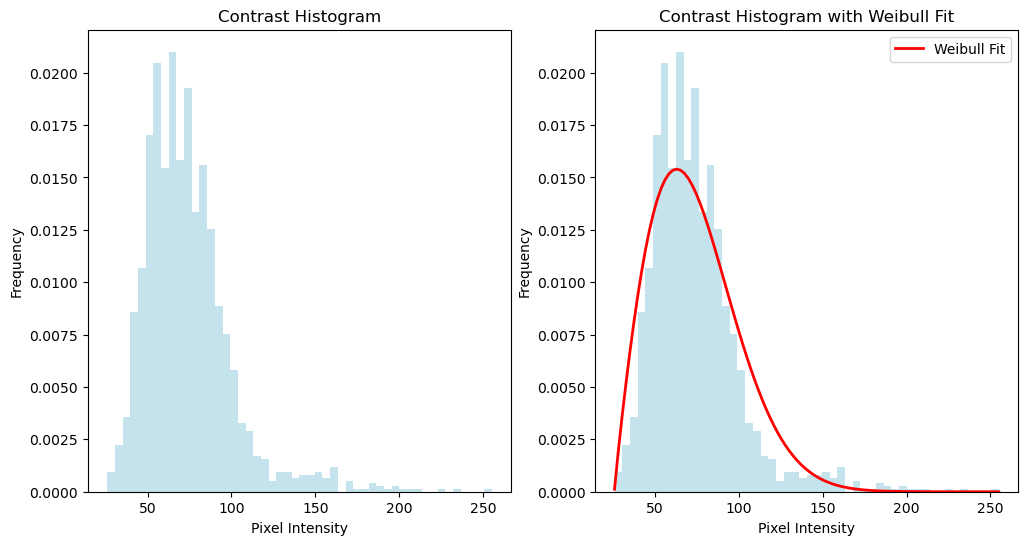

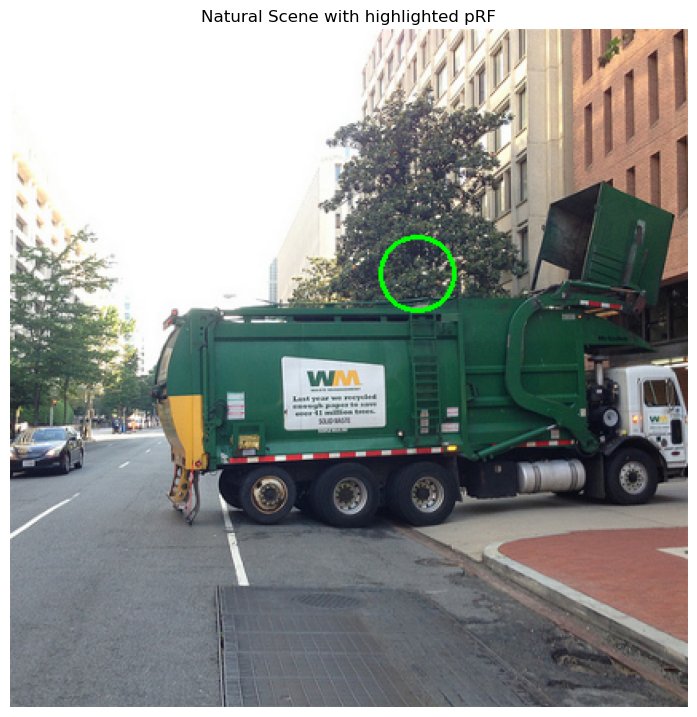

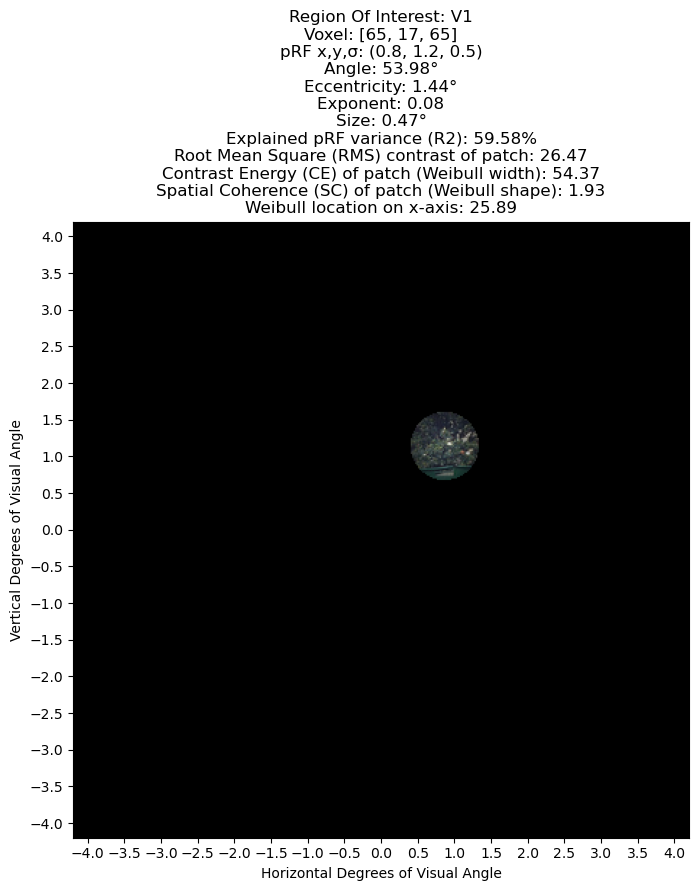

In [5]:
prf_details, weibull_pars = get_img_prf(show_stim(hide='y')[0], type='cut_gaussian', binary_masks = vismask_dict, 
            prf_proc_dict = prf_dict, roi = 'V1', sigma_min = .4, 
            sigma_max = 1, ecc_max = 2, rand_seed=None, invert='n', central = 'n', grid = 'n')



In [8]:
weibull_pars

prf_details

{'mask': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'x': 255.94320799355097,
 'y': 153.94794671897682,
 'pix_radius': 23.58598214285714,
 'deg_radius': 0.46617,
 'iterations': 3,
 'x_vox': 65,
 'y_vox': 17,
 'z_vox': 65,
 'x_deg': 0.8388775226960662,
 'y_deg': 1.1770288177896346,
 'angle': 53.975,
 'eccentricity': 1.44313,
 'exponent': 0.08488,
 'size': 0.46617,
 'R2': 59.58163}

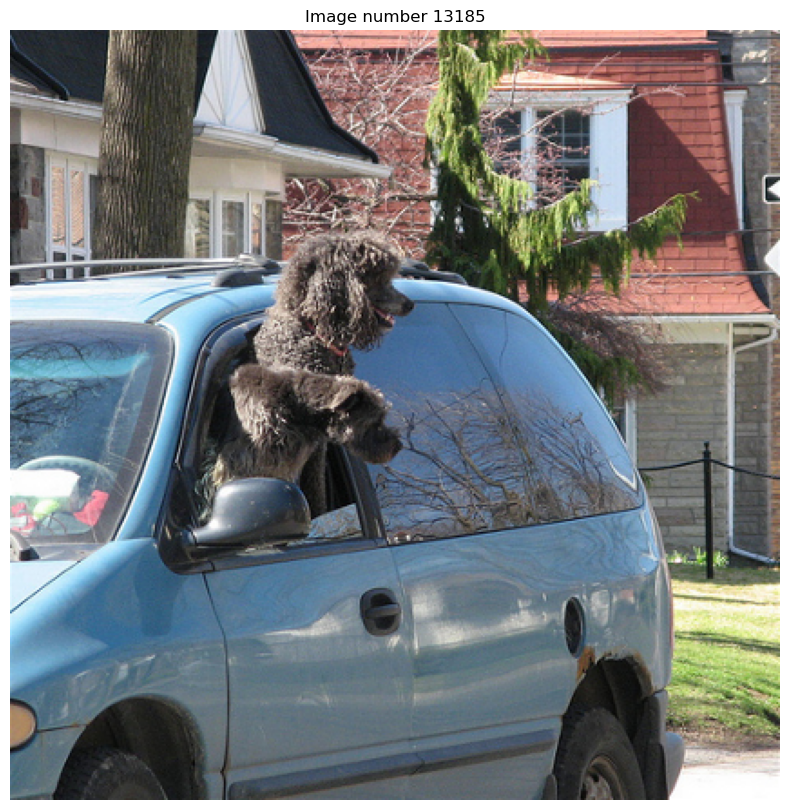

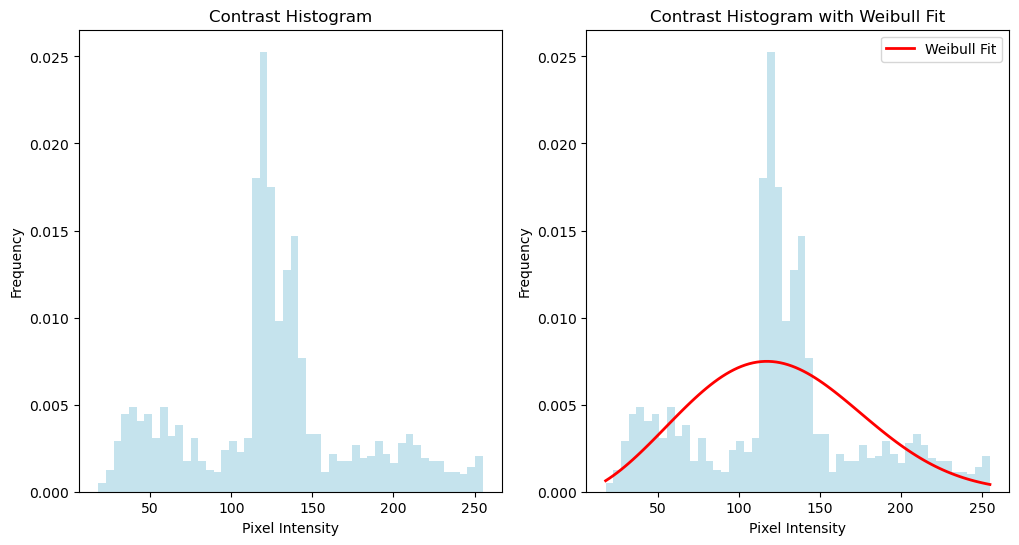

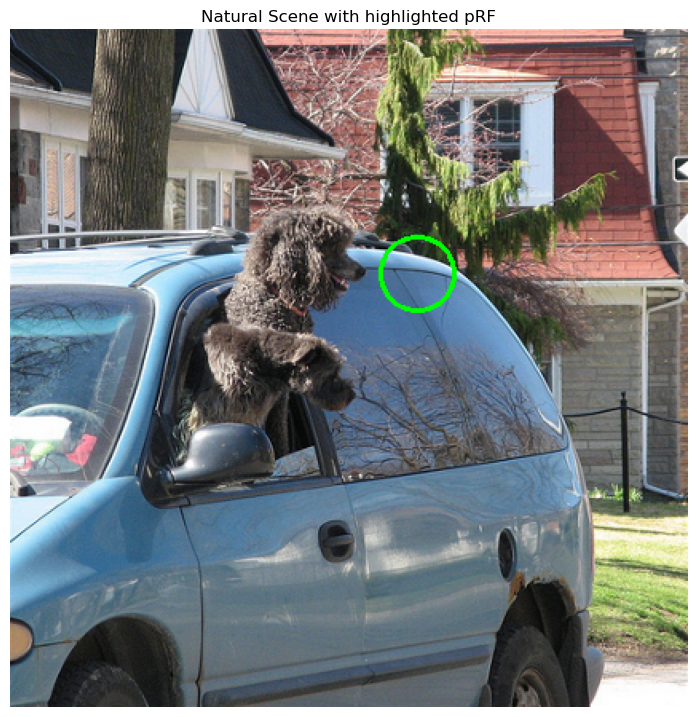

In [15]:
center = (prf_details['x'].astype(int), prf_details['y'].astype(int))

rms_contrast, weibull_params, image_with_circle, mask, patch_pixels, mean_intensity = calculate_rms_contrast_circle(image_array = show_stim()[0], center = center, radius = prf_details['pix_radius'].astype(int))